# Deep Learning Enabled Semantic Communication Systems

Цель работы: Воспроизвести результаты представленной работы, получить практический опыт в имплементации и оценке работы методов глубоого обучения в семантических задачах коммуникации.

Развитие современных стандартов связи требует увеличения пропусконой способности. Однако, пропускная способность современных систем связи постепенно приближается к пределу Шенона. Одиним из способов обхода этого предела является семантическое кодирование. Оно позволяет извлечь из передаваемой информации только самую важную для понимания часть и тем самым значительно сократить количество передаваемых данных. 

Извлечь полузную информацию из данных можно с помощью языковых моделей. При проектировании таких моделей возникают следующие вопросы:
- Как извлечь информацию из битового представления данных
- Как определить семантическую погрешность модели
- Как спроектировать модеь совместного семантического и канального кодирования

В статье дают следующие ответы на эти вопросы:
- Для извлечения полезной информации из передаваемых данных предложено использование трансформеров, соединенных с канальными кодировщиками для более точного кодирования данных
- Точность модели предлагается определять с помощью кроссэнтропии и взаимной информации

![image](problem.png)

На рис. 1. представлена модель, состоящая из двух уровней - семантического и канального. Семантический уровень извлекает важную информацию из передаваемых данных, канальный - кодирует эту информацию для передачи по физическому каналу связи. Вся система состоит из заранее обученных передатчика и приемника. Оснавная цель системы - уменьшить семантическую ошибку и при этом сократить количество передаваемых символов.

![image](nn.png)

Детальное описание модели представлено на рис. 2.

Для оценки точности модели на переданных данных используется метрика BLEU $\in [0, 1]$:

$$ \log{BLEU} = \min{(1-{l_{\hat{s}} \over l_{s}}, 0)} + \sum_n^N{u_n\log{p_n}} $$

, где $ l_{\hat{s}}, l_{s} $ - длины полученной и отправленной последовательностей, $ u_n $ - весовой коэффициент n-граммы, 

$$ p_n = {\sum_k{\min{(C_k(\hat{s}), C_k(s))}} \over \sum_k{\min{C_k(\hat{s})}}} $$

, где $ C_k(\cdot) $ - функция подсчета частоты встречаемости k-ого элемента в n-грамме
BLEU отображает степень совпадения двух текстов, 1 означает ниавысшее совпадение. 

Обучение модели состоит из трех этапов (представлено на рис. 3):
- Происходит обучение модели оценки взаимной информации 
- Происходит обучение всей системы с помощью модели оценки взаимной информации   

Первые два этапа повторяются множество раз до достижения удовлетворительного результата

- Происходит дообучение модели в требуемых условиях

![image](modeltrain.png)

Text(0.5, 1.0, 'Fig. 6. BLEU score versus SNR for the same total number of transmitted symbols, with the proposed model over AWGN and Rayleight fading channels')

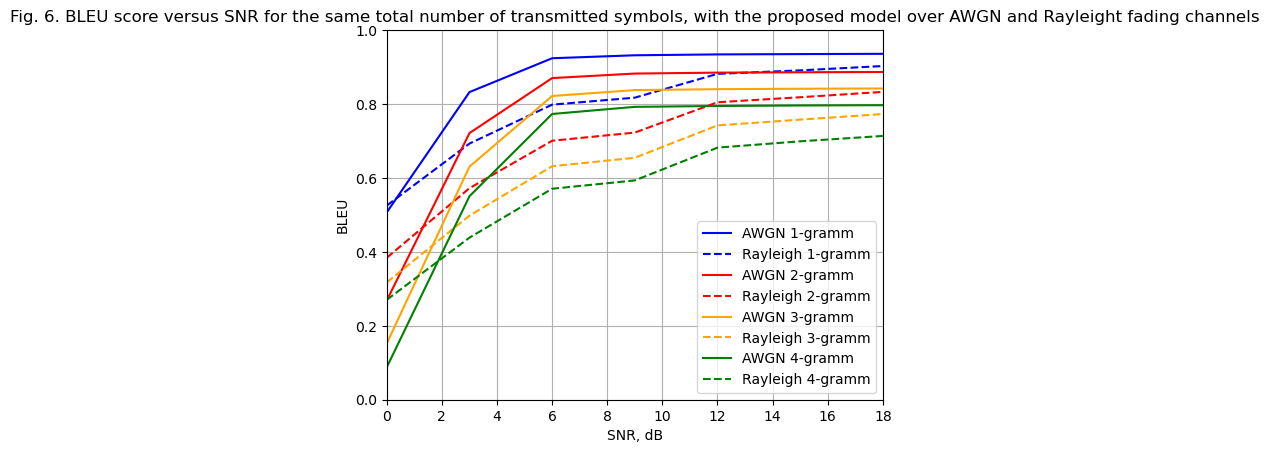

In [28]:
import numpy as np
import matplotlib.pyplot as plt

data_awgn = np.load('test_awgn.npy')
data_rayleigh = np.load('test_rayleigh.npy')

snr = [0,3,6,9,12,15,18]
color_s = ["blue", "red", "orange", "green"]

plt.figure
for i in range(data_awgn.shape[0]):
    plt.plot(snr, data_awgn[i], '-', label = "AWGN "+str(i+1)+"-gramm", color = color_s[i])

    plt.plot(snr, data_rayleigh[i], '--', label = "Rayleigh "+str(i+1)+"-gramm", color = color_s[i])

plt.legend()
plt.grid()
plt.xlabel("SNR, dB")
plt.ylabel("BLEU")
plt.ylim([0, 1])
plt.xlim([min(snr), max(snr)])
plt.title("Fig. 6. BLEU score versus SNR for the same total number of transmitted symbols, with the proposed model over AWGN and Rayleight fading channels")



Из рис. 6. видно, что модель позволяет достичь высоких значений метрики BLUE при SNR > 4 dB для AWGN каналов и SNR > 6 dB для Rayleight каналов. При увеличении порядка энграммы метрика BLUE уменьшается - модель хуже сохраняет смысл с увеличением длины последовательности слов. 

Исходная статья: H. Xie, Z. Qin, G. Y. Li and B. -H. Juang, "Deep Learning Enabled Semantic Communication Systems," in IEEE Transactions on Signal Processing, vol. 69, pp. 2663-2675, 2021, doi: 10.1109/TSP.2021.3071210.